# Course 3 Assignment 2

For this we need to centre our data and do a simple linear regression.

One of the assumptions for a simple linear regression is that our data is independent. My data isn't independent, it is part of a longitudinal study where the same data is collected repeatedly from the same subjects (countries). So this isn't really a useful test, but is just to demonstrate that I know how to do it.

In [1]:
# import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api
import statsmodels.formula.api as smf
%matplotlib inline

## Loading and preparing data

In [3]:
# show all columns
pd.set_option('display.max_columns', None)
# loading the data from the local file
df = pd.read_csv('data/covid_data.csv')

In [4]:
# prepare data
df.date = pd.to_datetime(df.date)
dfx = df.dropna(subset=['continent'])  # gets rid of summaries for 'world' and 'africa' etc, as I only want data for countries
# the columns I need for this task
cols = ['location', 'date', 'new_cases_per_million','new_deaths_per_million', 'people_fully_vaccinated', 'human_development_index', 'population']
dfx = dfx[cols].dropna()  # getting rid of rows with empty data
# getting rid of rows where new cases and  deaths are below zero (due to error correction)
dfx = dfx[dfx.new_deaths_per_million >= 0]
dfx = dfx[dfx.new_cases_per_million >= 0]
# limiting it to 2021 which is when vaccinations really got started
dfx = dfx[dfx['date'].dt.year == 2021]
# so as to compare like with like, I'm keeping only countries with human development indices over 0.9
dfx = dfx[dfx.human_development_index > 0.9]
# calculating percentage of population fully vaccinated
dfx['percentage_fully_vaccinated'] = (dfx.people_fully_vaccinated/dfx.population) * 100
dfx.tail()

,location,date,new_cases_per_million,new_deaths_per_million,people_fully_vaccinated,human_development_index,population,percentage_fully_vaccinated
81005,United States,2021-04-25,96.872,0.843,94772329.0,0.926,331002647.0,28.631895
81006,United States,2021-04-26,144.080,1.432,95888088.0,0.926,331002647.0,28.968979
81007,United States,2021-04-27,153.642,1.937,96747454.0,0.926,331002647.0,29.228604
81008,United States,2021-04-28,166.539,2.897,98044421.0,0.926,331002647.0,29.620434
81009,United States,2021-04-29,175.826,2.580,99668945.0,0.926,331002647.0,30.111223


## Plot (again!)

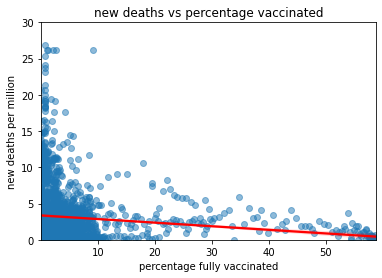

In [12]:
g = sns.regplot(data=dfx, x="percentage_fully_vaccinated", y="new_deaths_per_million", scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
_ = g.set(ylim = (0, 30), xlabel='percentage fully vaccinated', ylabel='new deaths per million', title='new deaths vs percentage vaccinated')

## Centre mean of explanatory variable

In [14]:
dfx['vaccinated_centred'] = dfx.percentage_fully_vaccinated - dfx.percentage_fully_vaccinated.mean()
dfx.vaccinated_centred.mean()

1.1682260230993534e-15

## Simple logistic regression

In [21]:
reg = smf.ols('new_deaths_per_million ~ vaccinated_centred', data=dfx).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     new_deaths_per_million   R-squared:                       0.016
Model:                                OLS   Adj. R-squared:                  0.015
Method:                     Least Squares   F-statistic:                     30.08
Date:                    Mon, 03 May 2021   Prob (F-statistic):           4.73e-08
Time:                            14:58:21   Log-Likelihood:                -5145.4
No. Observations:                    1849   AIC:                         1.029e+04
Df Residuals:                        1847   BIC:                         1.031e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              3.0752      0.091     33.790      0.000       2.897       3.254
vaccinated_centred    -0.0496      0.009     -5.484      0.000      -0.067      -0.032
==============================================================================
Omnibus:                      931.487   Durbin-Watson:                   0.796
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5949.913
Skew:                           2.327   Prob(JB):                         0.00
Kurtosis:                      10.455   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Summary

The results of the linear regression model show that the pergcentage of the population fully vaccinated (Beta=-0.0496, p<0.001) is significantly and negatively associated with the number of new deaths per million people. That is, the higher the percentage of people vaccinated, the lower the number of new deaths.

However, this assumes that my data is independent, which it is not, it is from a longitudinal study where data is repeatedly taken from the same subjects (countries), so the regression analysis is not actually suitable or reliable.